# Семинар 8. Временные ряды

## План
### 1. Работа с временным рядом, форматирование, визуализация
### 2. Прогнозирование временного ряда

## 1. Работа с временным рядом, форматирование, визуализация

![](https://mlcourse.ai/images/topic4-teaser.png)

Временно́й ряд — собранный в разные моменты времени статистический материал о значении каких-либо параметров исследуемого процесса.

Скалярным временным рядом 
$$\{x_i\}_{i=1}^N$$
называется массив из $N$ чисел, представляющих собой значения некоторой измеренной (наблюдаемой динамической переменной $x(t)$ с некоторым постоянным шагом $τ$ по времени, $$t_i = t_0 + (i − 1)τ : x_i = x(t_i), i = 1, . . . , N.$$  

Такой подход используется, когда нет возможности построить уравнения движения.  

Примеры: 
- объёмы продаж в торговых сетях
- объёмы потребления и цены электроэнергии
- остатки складских запасов
- рыночные цены
- дорожный трафик (прогнозирование пробок)

Основные свойства временных рядах:
- тренды
- сезонности

Какие задачи здесь возникают?

Для начала визуализируем наши данные и попробуем сформулировать новые гипотезы о задаче, которую хотим решить.

Загрузим данные и посмотрим на структуру данных

## Чтение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv('MarketArrivals_Ind.csv')

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Анализ структуры данных

In [2]:
df.shape

(10227, 10)

In [3]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


### Cтруктура данных
В нашем датафрейме 10 столбцов.

В датафрейме следующие типы данных:
- **CATEGORICAL**: state, city, market
- **TIME INTERVAL**: month, year, date
- **QUANTITATIVE**: quantity, priceMin, priceMax, priceModal

Посмотрим какие типы данных pandas определил при чтении данных.

In [4]:
# Выведем типы данных
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

Видим, что количественные столбцы отображаться как целочисленные и категориальные как объекты(строки), что отлично.
Однако, столбцы `date` прочитаны как объект, а не даты(время). Исправим это.

In [5]:
df.date = pd.DatetimeIndex(df.date)

In [6]:
df.shape

(10227, 10)

In [7]:
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [8]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


### Задание 1. Насколько большой был рынок в Бангалоре по сравнению с другими городами в 2010 году?

Ответим на этот вопрос, используя данные 2010го года.

In [9]:
df2010 = df[df.year == 2010]

In [10]:
df2010.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
10,ABOHAR(PB),February,2010,555,1143,1460,1322,PB,ABOHAR,2010-02-01
18,ABOHAR(PB),March,2010,385,510,878,688,PB,ABOHAR,2010-03-01
25,ABOHAR(PB),April,2010,840,466,755,611,PB,ABOHAR,2010-04-01
32,ABOHAR(PB),May,2010,2050,391,578,494,PB,ABOHAR,2010-05-01


In [11]:
df2010Bang = df[(df.year == 2010) & (df.city == 'BANGALORE')]

In [12]:
df2010Bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
722,BANGALORE,January,2010,423649,502,1837,1267,KNT,BANGALORE,2010-01-01
735,BANGALORE,February,2010,316685,495,1429,1011,KNT,BANGALORE,2010-02-01
748,BANGALORE,March,2010,368644,386,895,661,KNT,BANGALORE,2010-03-01
760,BANGALORE,April,2010,404805,287,730,545,KNT,BANGALORE,2010-04-01
772,BANGALORE,May,2010,395519,306,827,564,KNT,BANGALORE,2010-05-01


In [13]:
# Считаем суммы по quantity
df2010City = df2010.groupby(['city']).quantity.sum()

In [14]:
df2010City.head()

city
ABOHAR          11835
AGRA           756755
AHMEDABAD     1135418
AHMEDNAGAR    1678032
ALWAR          561145
Name: quantity, dtype: int64

In [15]:
type(df2010City)

pandas.core.series.Series

In [16]:
# Создаем dataframe
df2010City = df2010.groupby(['city'], as_index=False).quantity.sum()

In [17]:
df2010City.head()

,city,quantity
0,ABOHAR,11835
1,AGRA,756755
2,AHMEDABAD,1135418
3,AHMEDNAGAR,1678032
4,ALWAR,561145


In [18]:
# Cортируем df по Quantity
df2010City = df2010City.sort_values(by = "quantity", ascending = False)
df2010City.head()


,city,quantity
6,BANGALORE,6079067
16,DELHI,3508582
39,KOLKATA,3495320
56,PUNE,3326024
67,SOLAPUR,3310419


### Выясним, какая сортировка работает быстрее

In [19]:
%timeit df2010City.quantity.sort_values()

168 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%timeit df2010City.sort_values(by = "quantity", ascending = False)

210 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit sorted(df2010City.quantity)

19.5 µs ± 637 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Визуализируем наши выводы

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

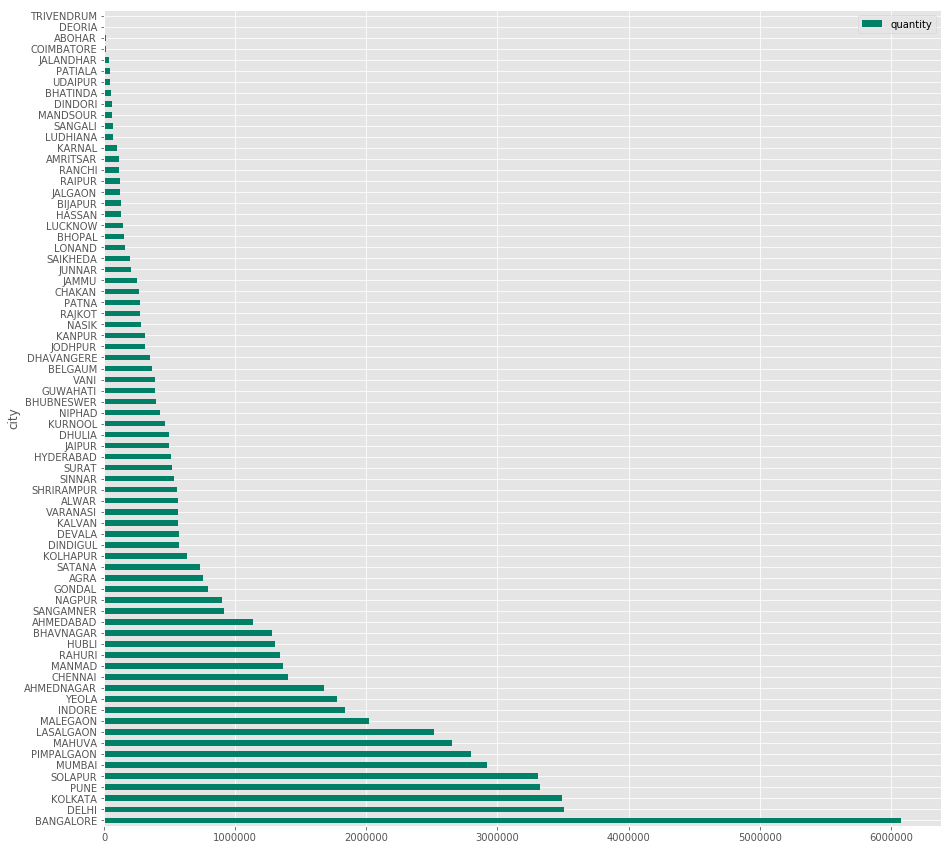

In [23]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
df2010City.plot(kind ="barh", x = 'city', y = 'quantity', colormap='summer')

### Задание 2. Найти штат с наибольшими продажами в 2015 году

In [24]:
### your code here

### Задание 3. Вывести график кол-ва продаж в штате MS по всем городам в 2015 году

In [27]:
### your code here

### Задание 4. Растет ли разброс цен в Бангалоре с годами?

In [30]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [31]:
dfBang = df[df.city == 'BANGALORE']

In [32]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [33]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146.00,146.00,146.00,146.00,146.00
mean,2009.59,523917.42,557.54,1313.88,1043.55
std,3.52,302369.03,381.42,911.10,667.51
min,2004.00,63824.00,145.00,338.00,320.00
25%,2007.00,329690.00,307.00,685.00,551.00
50%,2010.00,403530.50,448.00,1019.00,836.00
75%,2013.00,661252.00,653.00,1636.00,1325.50
max,2016.00,1639032.00,2377.00,4698.00,3430.00


### Уменьшим точность чисел для легкости чтения

In [34]:
pd.set_option('precision', 0)

In [35]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146.00,146.00,146.00,146.00,146.00
mean,2009.59,523917.42,557.54,1313.88,1043.55
std,3.52,302369.03,381.42,911.10,667.51
min,2004.00,63824.00,145.00,338.00,320.00
25%,2007.00,329690.00,307.00,685.00,551.00
50%,2010.00,403530.50,448.00,1019.00,836.00
75%,2013.00,661252.00,653.00,1636.00,1325.50
max,2016.00,1639032.00,2377.00,4698.00,3430.00


### Установим Index как date

In [36]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [37]:
dfBang.index

Int64Index([716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
            ...
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861],
           dtype='int64', length=146)

In [38]:
# Упорядочим по датам
dfBang = dfBang.sort_values(by = "date")
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
729,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
742,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
754,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
766,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [39]:
# Установим index
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [40]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


Нарисуем график величины priceMod

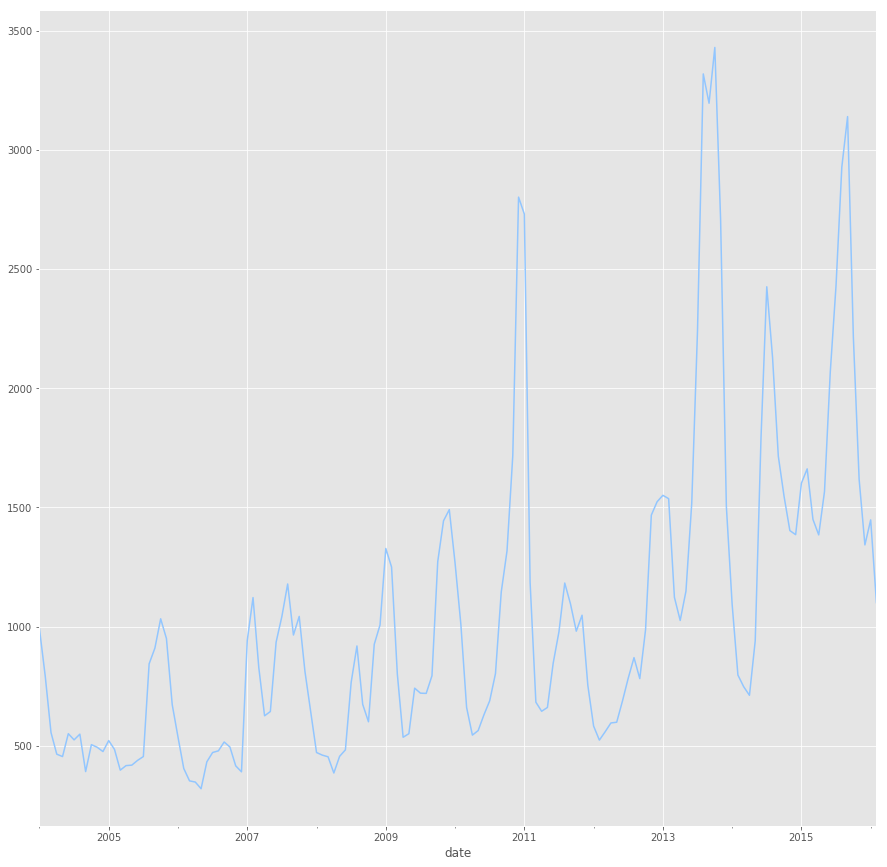

In [41]:
dfBang.priceMod.plot()

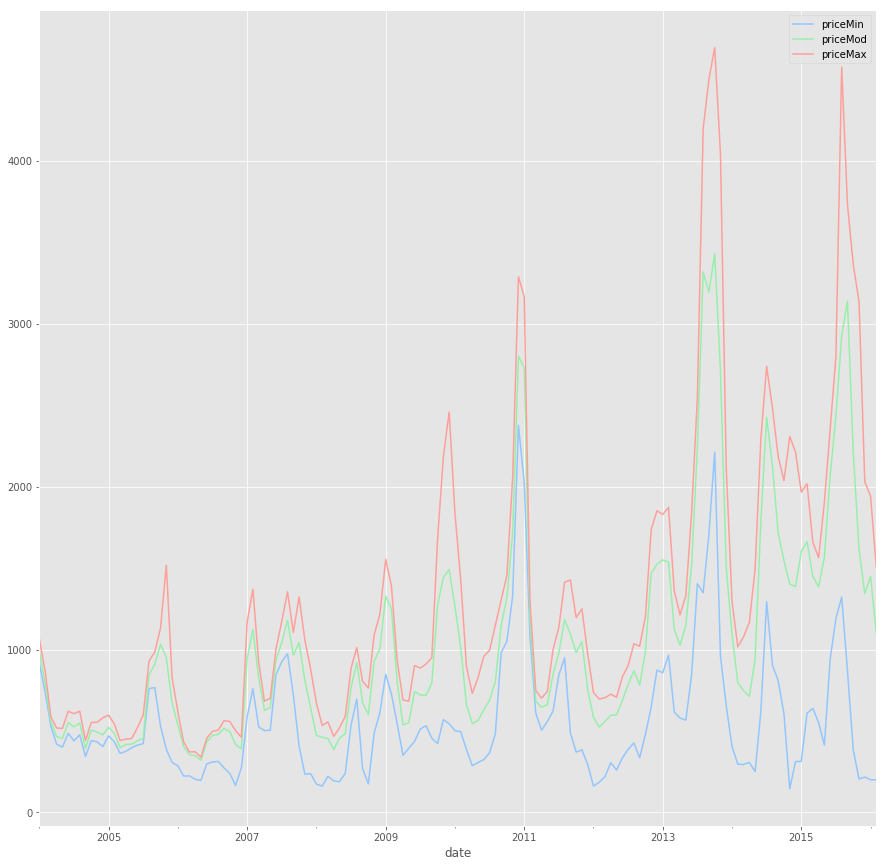

In [42]:
dfBang.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

Для расчета изменения создадим новый атрибут с разницей priceMax и priceMin  

In [43]:
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

In [44]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
date,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116


# Выведем график priceDiff

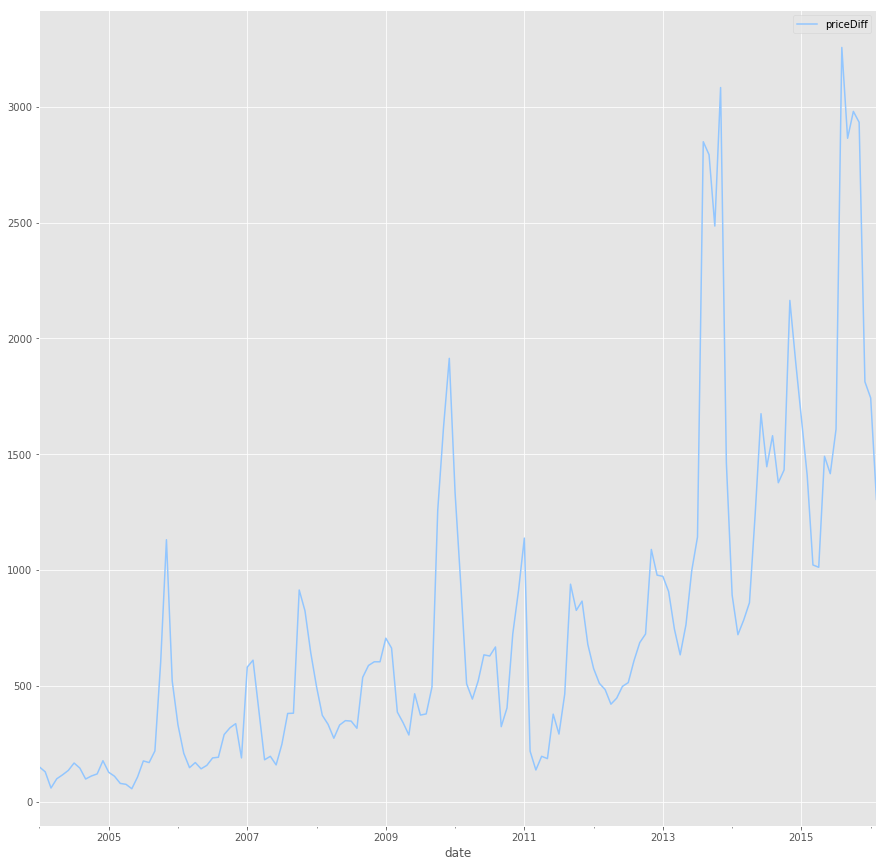

In [45]:
dfBang.plot(kind = 'line', y = 'priceDiff')

### Сводные таблицы (pivot table)

Возможность создавать сводные таблицы присутствует в электронных таблицах и других программах, оперирующих табличными данными.  
Сводная таблица принимает на входе данные из отдельных столбцов и группирует их, формируя двумерную таблицу, реализующую многомерное обобщение данных.  
Чтобы ощутить разницу между сводной таблицей и операцией GroupBy, можно представить себе сводную таблицу, как многомерный вариант агрегации посредством GroupBy. То есть данные разделяются, преобразуются и объединяются, но при этом разделение и объединение осуществляются не по одномерному индексу, а по двумерной сетке.
![](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)


In [46]:
# Создадим новый столбец для значения Месяц
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [47]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff,monthVal
date,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150,1
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129,2
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59,3
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99,4
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116,5


Cоздадим сводную таблицу по priceDiff (строки - monthval, столбцы - year)

In [48]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceDiff", 
                             columns = "year", index = "monthVal")

In [49]:
dfBangPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
monthVal,,,,,,,,,,,,,
1,150.00,127.00,331.00,581.00,497.00,706.00,1335.00,1138.00,575.00,973.00,892.00,1654.00,1743.00
2,129.00,110.00,209.00,611.00,373.00,663.00,934.00,218.00,511.00,907.00,721.00,1409.00,1305.00
3,59.00,79.00,147.00,398.00,334.00,387.00,509.00,137.00,484.00,745.00,784.00,1022.00,nan
4,99.00,75.00,169.00,181.00,274.00,341.00,443.00,196.00,421.00,634.00,859.00,1012.00,nan
5,116.00,56.00,142.00,196.00,331.00,288.00,521.00,186.00,447.00,764.00,1245.00,1491.00,nan
6,135.00,107.00,157.00,159.00,350.00,466.00,634.00,378.00,498.00,997.00,1675.00,1416.00,nan
7,167.00,176.00,189.00,248.00,348.00,374.00,629.00,292.00,514.00,1143.00,1446.00,1608.00,nan
8,145.00,169.00,192.00,381.00,317.00,379.00,668.00,465.00,609.00,2849.00,1580.00,3256.00,nan
9,98.00,219.00,290.00,382.00,537.00,495.00,324.00,939.00,687.00,2793.00,1377.00,2864.00,nan


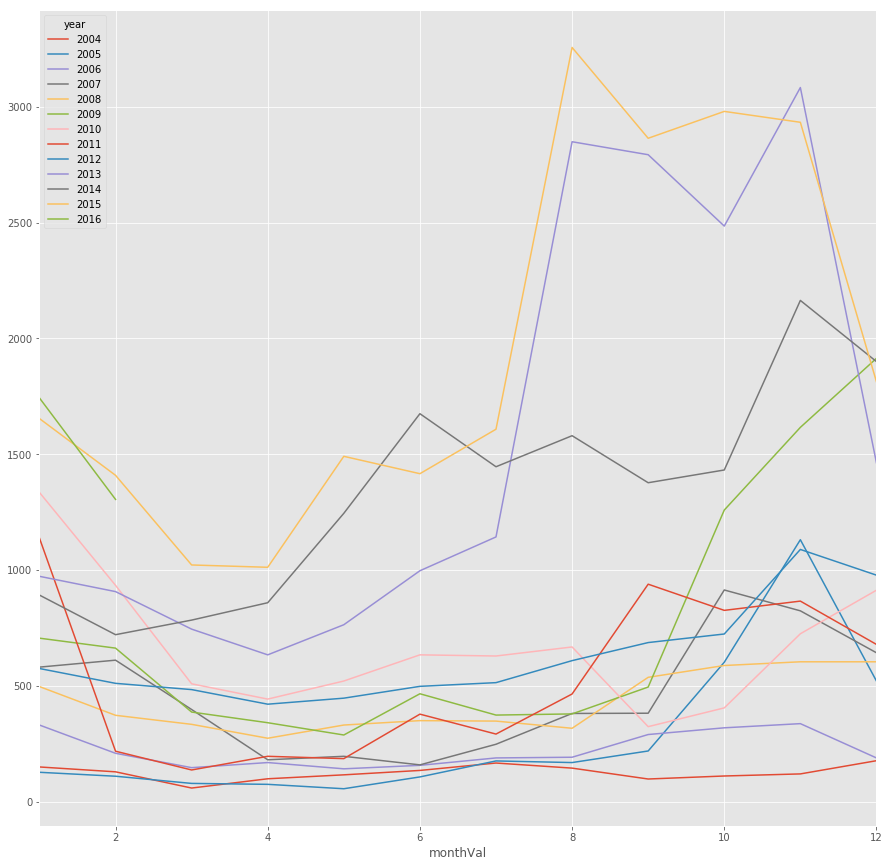

In [50]:
plt.style.use('ggplot')
dfBangPivot.plot()

### Задание 5. Вывести сводную таблицу с quantity по штатам и годам

In [51]:
### your code here

# 2. Прогнозирование временного ряда

### Подготовка данных

In [56]:
# Отсортируем и добавим date в индекс
df.index = pd.PeriodIndex(df.date, freq='M')
df = df.sort_values(by = "date")

In [57]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Будем работать с данными в городе Бангалор

In [58]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [59]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [60]:
# Удалим лишние столбцы
dfBang = dfBang.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)

In [61]:
dfBang.head()

,quantity,priceMod,date
date,,,
2004-01,227832,991,2004-01-01
2004-02,225133,793,2004-02-01
2004-03,221952,556,2004-03-01
2004-04,185150,465,2004-04-01
2004-05,137390,455,2004-05-01


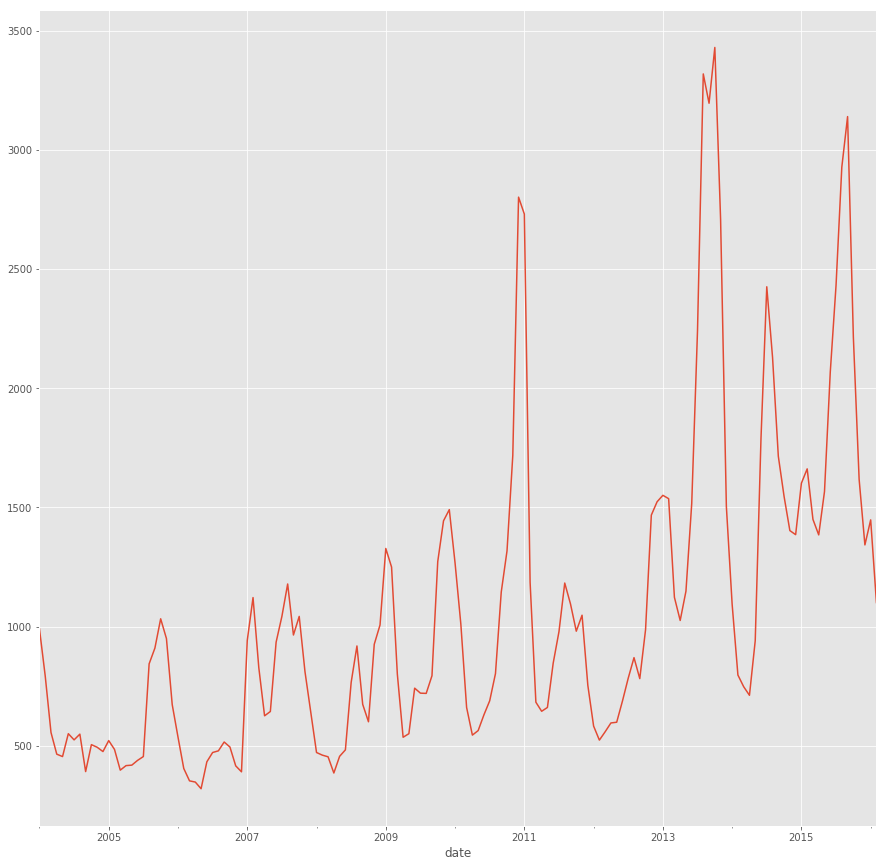

In [62]:
dfBang.priceMod.plot()

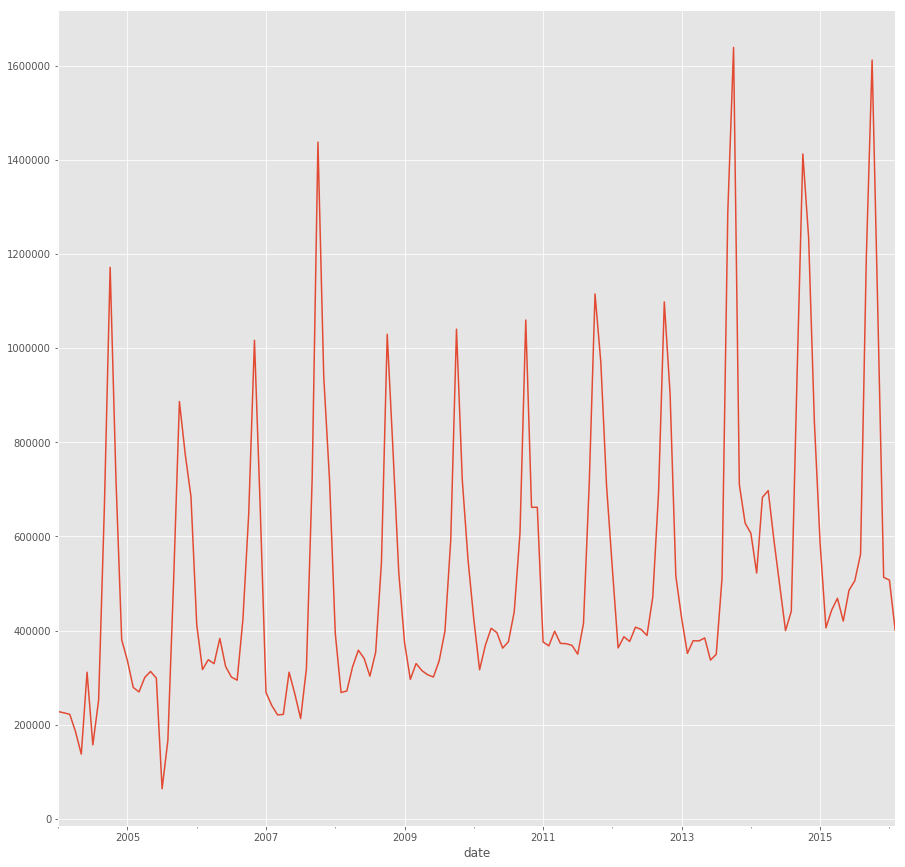

In [63]:
dfBang.quantity.plot()

## Начнем с трех простых моделей прогноза цены

### 1. Прогнозирование средним (Mean Constant Model)
### 2. Линейная модель (Linear Trend Model)
### 3. Модель со случайными изменениями (Random Walk Model)

### Логарифмическое преобразование данных
Логарифмирование помогает стабилизировать разброс значений.

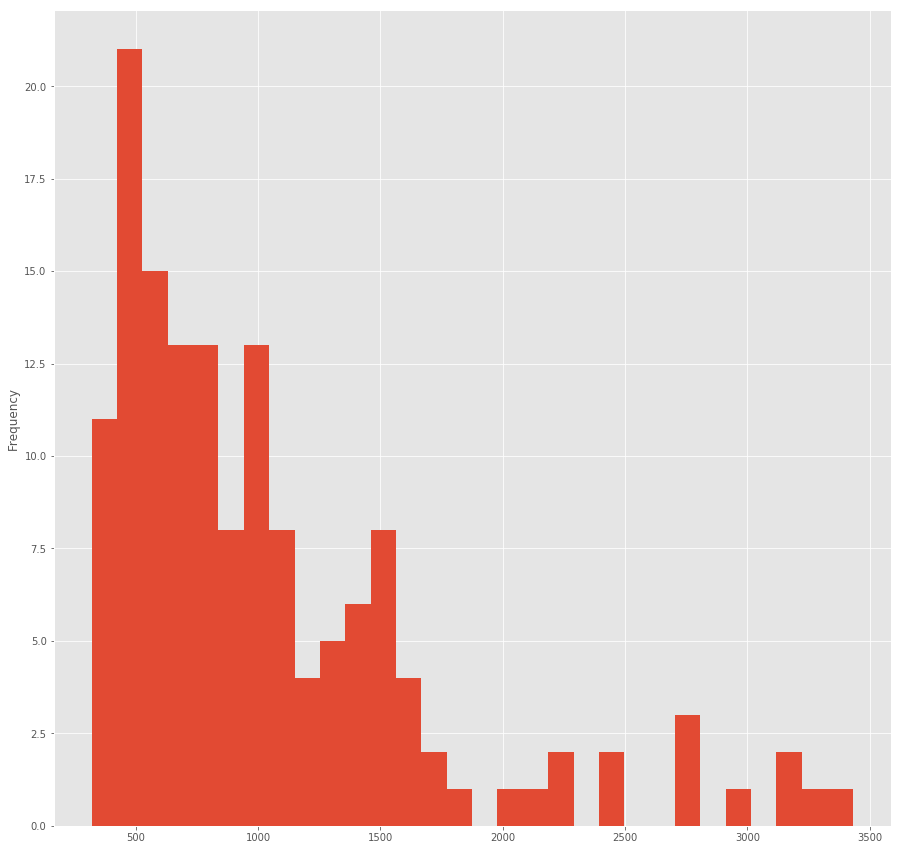

In [64]:
dfBang.priceMod.plot(kind = "hist", bins = 30)

При визуализации можем заметить, что есть данные, далеко отстающие от среднего значения, что может искажать модель регрессии. Наша задача минимизировать влияние таких данных. Желательно не исключая их.  
В этом случае самый распространенный вариант действия - логарифмирование переменной.

In [65]:
dfBang['priceModLog'] = np.log(dfBang.priceMod)
dfBang.head()

,quantity,priceMod,date,priceModLog
date,,,,
2004-01,227832,991,2004-01-01,6.90
2004-02,225133,793,2004-02-01,6.68
2004-03,221952,556,2004-03-01,6.32
2004-04,185150,465,2004-04-01,6.14
2004-05,137390,455,2004-05-01,6.12


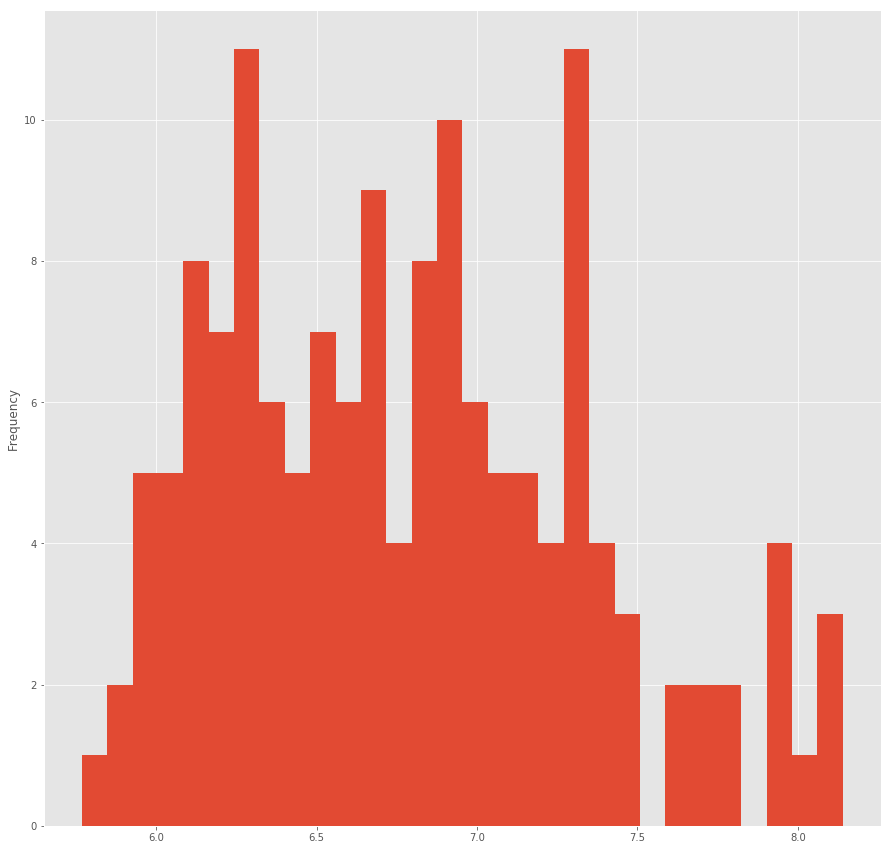

In [66]:
dfBang.priceModLog.plot(kind = "hist", bins = 30)

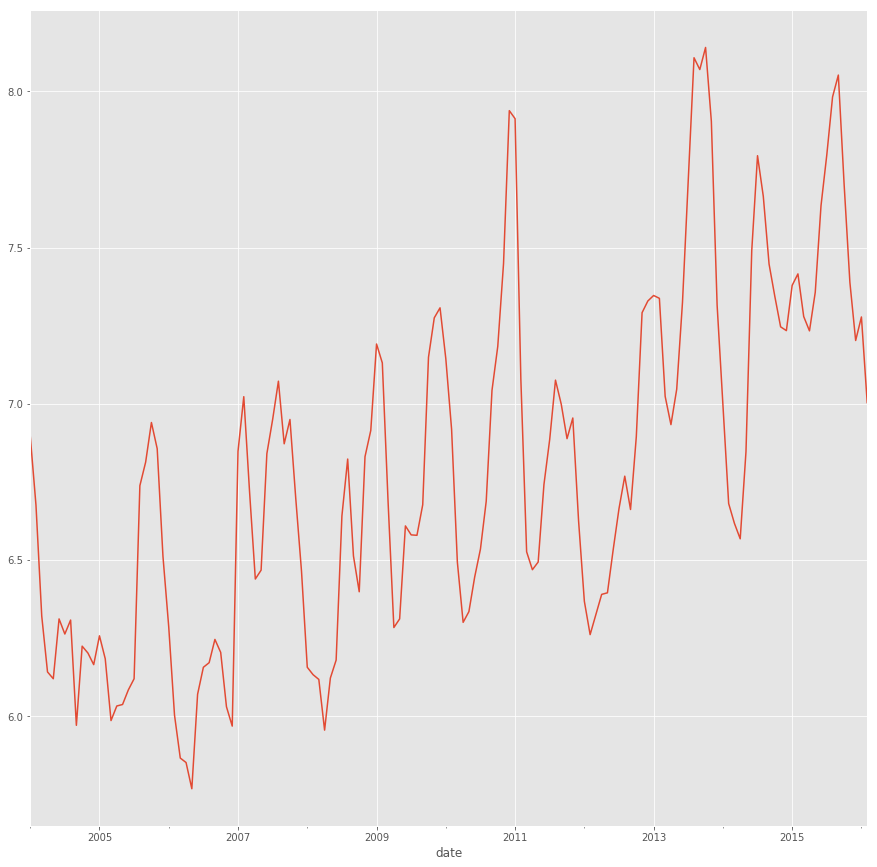

In [67]:
dfBang.priceModLog.plot()

## 2.1. Прогнозирование средним 

In [68]:
model_mean_pred = dfBang.priceModLog.mean()

In [69]:
# Запишем это значение в priceMean
dfBang["priceMean"] = np.exp(model_mean_pred)

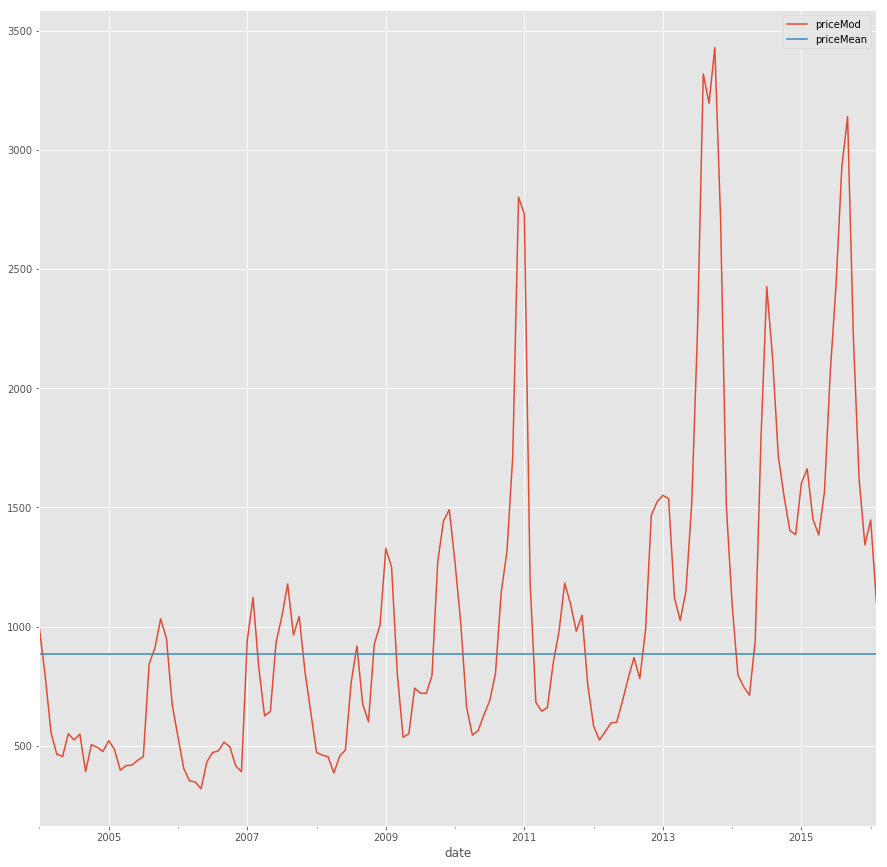

In [70]:
dfBang.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

**Как мерить качество?**

Чтобы обучать регрессионные модели, нужно определиться, как именно измеряется качество предсказаний.   
Будем использовать метрику RMSE (Root Mean Squared Error) - корень среднего квадрата отклонения.

$$RMSE = \Sigma \sqrt{ (\hat{y} - y)^2/n} $$ , 
где $\hat{y}$ это предсказанное значение y

#### Какие еще метрики применимы в задачах с временными рядами?

In [71]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [72]:
model_mean_RMSE = RMSE(dfBang.priceMean, dfBang.priceMod)
model_mean_RMSE

683.9533483996255

In [73]:
dfBangResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dfBangResults.head()

,Model,Forecast,RMSE


In [74]:
dfBangResults.loc[0,"Model"] = "Mean"
dfBangResults.loc[0,"Forecast"] = np.exp(model_mean_pred)
dfBangResults.loc[0,"RMSE"] = model_mean_RMSE
dfBangResults.head()

,Model,Forecast,RMSE
0,Mean,884.57,683.95


### Задание 6. Постройте модель средних для величины quantity

In [75]:
### your code here
model_qmean_pred = 

523917.424658


## 2.2. Линейная модель

Построим линейную зависиммость между priceModLog and time.   
Уравнение регрессии строится с помощью метода наимменьших квадратов.

In [78]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,quantityMean
date,,,,,,
2004-01,227832,991,2004-01-01,6.90,884.57,523917.42
2004-02,225133,793,2004-02-01,6.68,884.57,523917.42
2004-03,221952,556,2004-03-01,6.32,884.57,523917.42
2004-04,185150,465,2004-04-01,6.14,884.57,523917.42
2004-05,137390,455,2004-05-01,6.12,884.57,523917.42


In [79]:
dfBang.dtypes

quantity                 int64
priceMod                 int64
date            datetime64[ns]
priceModLog            float64
priceMean              float64
quantityMean           float64
dtype: object

In [80]:
dfBang.date.min()

Timestamp('2004-01-01 00:00:00')

In [81]:
dfBang["timeIndex"] = dfBang.date - dfBang.date.min()

In [82]:
dfBang.dtypes

quantity                  int64
priceMod                  int64
date             datetime64[ns]
priceModLog             float64
priceMean               float64
quantityMean            float64
timeIndex       timedelta64[ns]
dtype: object

In [83]:
dfBang["timeIndex"] =  dfBang["timeIndex"]/np.timedelta64(1, 'M')

In [84]:
dfBang["timeIndex"] = dfBang["timeIndex"].round(0).astype(int)

In [85]:
dfBang.timeIndex.tail()

date
2015-10    141
2015-11    142
2015-12    143
2016-01    144
2016-02    145
Freq: M, Name: timeIndex, dtype: int64

In [86]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,quantityMean,timeIndex
date,,,,,,,
2004-01,227832,991,2004-01-01,6.90,884.57,523917.42,0
2004-02,225133,793,2004-02-01,6.68,884.57,523917.42,1
2004-03,221952,556,2004-03-01,6.32,884.57,523917.42,2
2004-04,185150,465,2004-04-01,6.14,884.57,523917.42,3
2004-05,137390,455,2004-05-01,6.12,884.57,523917.42,4


In [87]:
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfBang).fit()

In [88]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     139.8
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           5.75e-23
Time:                        11:34:57   Log-Likelihood:                -72.317
No. Observations:                 146   AIC:                             148.6
Df Residuals:                     144   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1121      0.066     92.830      0.000       5.982       6.242
timeIndex      0.0093      0.001     11.823      0.000       0.008       0.011
==============================================================================
Omnibus:                        4.750   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.739
Skew:                           0.405   Prob(JB):                       0.0935
Kurtosis:                       2.648   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Выведем параметры нашей линейной модели

In [89]:
model_linear.params

Intercept   6.11
timeIndex   0.01
dtype: float64

In [90]:
c = model_linear.params[0]
c

6.112108132763634

In [91]:
m = model_linear.params[1]
m

0.009282603918039917

In [92]:
model_linear_pred = model_linear.predict()

In [93]:
model_linear_pred

array([ 6.11210813,  6.12139074,  6.13067334,  6.13995594,  6.14923855,
        6.15852115,  6.16780376,  6.17708636,  6.18636896,  6.19565157,
        6.20493417,  6.21421678,  6.22349938,  6.23278198,  6.24206459,
        6.25134719,  6.2606298 ,  6.2699124 ,  6.279195  ,  6.28847761,
        6.29776021,  6.30704282,  6.31632542,  6.32560802,  6.33489063,
        6.34417323,  6.35345583,  6.36273844,  6.37202104,  6.38130365,
        6.39058625,  6.39986885,  6.40915146,  6.41843406,  6.42771667,
        6.43699927,  6.44628187,  6.45556448,  6.46484708,  6.47412969,
        6.48341229,  6.49269489,  6.5019775 ,  6.5112601 ,  6.52054271,
        6.52982531,  6.53910791,  6.54839052,  6.55767312,  6.56695572,
        6.57623833,  6.58552093,  6.59480354,  6.60408614,  6.61336874,
        6.62265135,  6.63193395,  6.64121656,  6.65049916,  6.65978176,
        6.66906437,  6.67834697,  6.68762958,  6.69691218,  6.70619478,
        6.71547739,  6.72475999,  6.7340426 ,  6.7433252 ,  6.75

In [94]:
dfBang["priceLinear"] = np.exp(model_linear_pred)

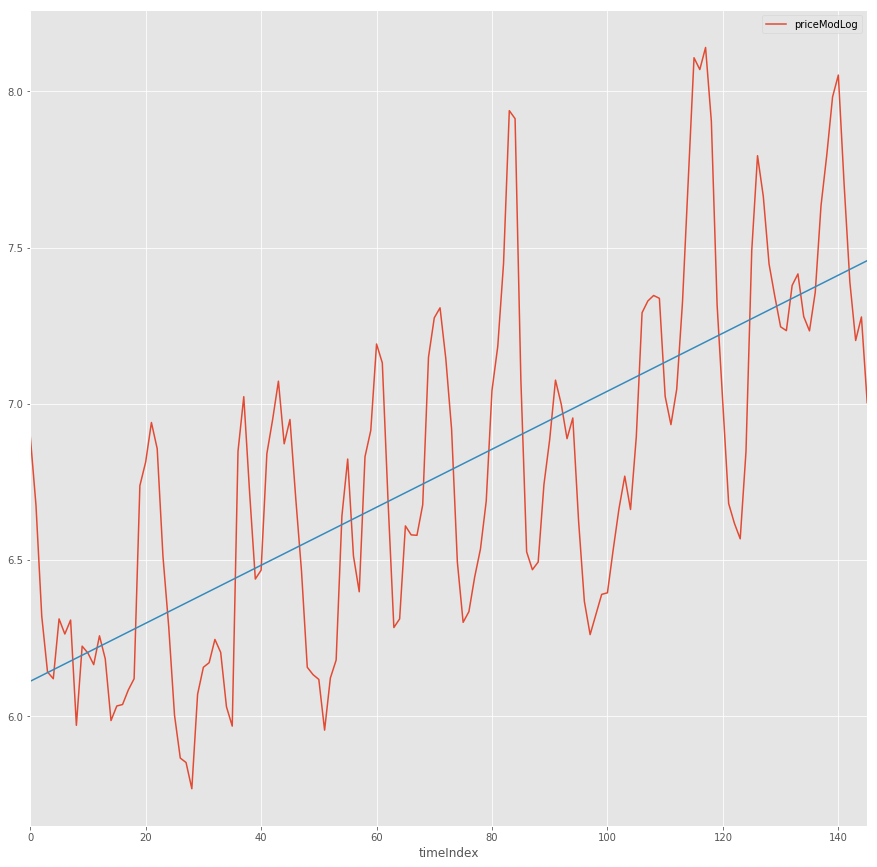

In [95]:
dfBang.plot(kind="line", x="timeIndex", y = "priceModLog")
plt.plot(dfBang.timeIndex,model_linear_pred, '-')

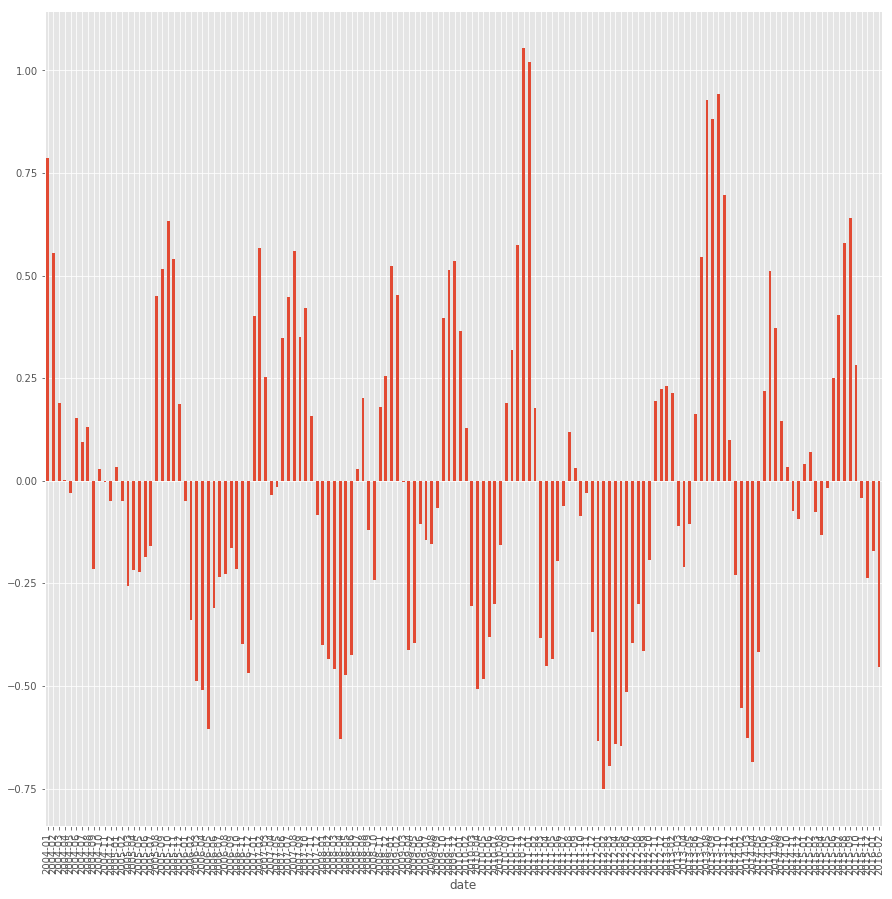

In [96]:
model_linear.resid.plot(kind = "bar")

Посчитаем ошибку RMSE на линейной модели:

In [97]:
model_linear_RMSE = RMSE(dfBang.priceLinear, dfBang.priceMod)
model_linear_RMSE

518.52360758414716

In [98]:
dfBangResults.loc[1,"Model"] = "Linear"
dfBangResults.loc[1,"Forecast"] = 'Linear'
dfBangResults.loc[1,"RMSE"] = model_linear_RMSE
dfBangResults.head()

,Model,Forecast,RMSE
0,Mean,884.57,683.95
1,Linear,Linear,518.52


### Задание 7. Постройте линейную модель для величины quantity

In [99]:
### your code here
model_linear_q = 